# Retention Example 

In [5]:
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from __future__ import division

mpl.rc('savefig', dpi=100)
plt.style.use('ggplot')

In [6]:
# Let's load our dataset and take a look at it in a couple of ways.
data = pd.read_csv("DATA_3.02_HR2.csv").dropna()
data.head()
# Satisfaction
# Last project evaluation
# Average number of hours worked per project
# Number of projects
# Time in company
# Newborn
# Left the company

,S,LPE,NP,ANH,TIC,Newborn,left
0,0.38,0.53,2,157,3,0,1
1,0.80,0.86,5,262,6,0,1
2,0.11,0.88,7,272,4,0,1
3,0.72,0.87,5,223,5,0,1
4,0.37,0.52,2,159,3,0,1


In [7]:
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html
data.describe()

,S,LPE,NP,ANH,TIC,Newborn,left
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,0.629463,0.716558,3.801833,200.437917,3.228750,0.154167,0.166667
std,0.241100,0.168368,1.163906,48.740178,1.056811,0.361123,0.372694
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.480000,0.570000,3.000000,157.000000,2.000000,0.000000,0.000000
50%,0.660000,0.720000,4.000000,199.500000,3.000000,0.000000,0.000000
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000


In [8]:
# Look at the frequencies for the left variable
data["left"].value_counts() 

0    10000
1     2000
Name: left, dtype: int64

In [9]:
data["left"].value_counts(normalize=True) 

0    0.833333
1    0.166667
Name: left, dtype: float64

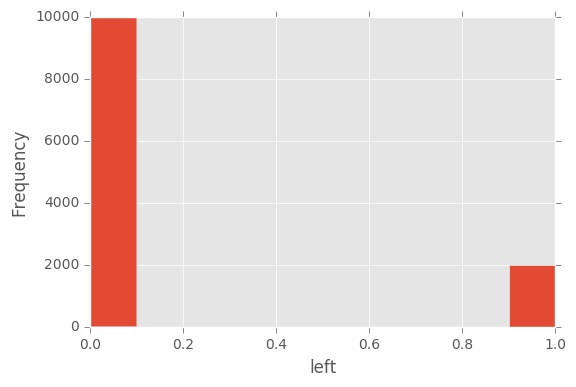

In [10]:
# alternatively, plot a histogram
plt.hist(data["left"])
plt.xlabel("left")
plt.ylabel("Frequency")

In [11]:
# Let's check out the correlations
data.corr()

,S,LPE,NP,ANH,TIC,Newborn,left
S,1.000000,0.095705,-0.132432,-0.005706,-0.215277,0.040263,-0.351532
LPE,0.095705,1.000000,0.271226,0.265484,0.122709,-0.005377,0.011838
NP,-0.132432,0.271226,1.000000,0.332510,0.249132,-0.005233,0.028883
ANH,-0.005706,0.265484,0.332510,1.000000,0.134874,-0.012539,0.068599
TIC,-0.215277,0.122709,0.249132,0.134874,1.000000,-0.020568,0.274756
Newborn,0.040263,-0.005377,-0.005233,-0.012539,-0.020568,1.000000,-0.125909
left,-0.351532,0.011838,0.028883,0.068599,0.274756,-0.125909,1.000000


In [12]:
# Estimate the drivers of attrition using a Generalized Linear Model.
# http://statsmodels.sourceforge.net/devel/examples/notebooks/generated/glm_formula.html
# The formula is again of the form
#   response variable ~ explanatory variables
logreg = smf.glm(
    formula="left ~ S + LPE + NP + ANH + TIC + Newborn",
    data=data,
    family=sm.families.Binomial()).fit()

In [13]:
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   left   No. Observations:                12000
Model:                            GLM   Df Residuals:                    11993
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                             1.0
Method:                          IRLS   Log-Likelihood:                -4254.5
Date:                Fri, 13 Jan 2017   Deviance:                       8508.9
Time:                        20:35:32   Pearson chi2:                 9.30e+03
No. Iterations:                     8                                         
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -1.2412      0.160     -7.751      0.000        -1.555    -0.927
S             -3.8163      0.121    -31.607      0.000        -4.053    -3.580
LPE            0.5044      0.181      2.788      0.005         0.150     0.859
NP            -0.3592      0.026    -13.569      0.000        -0.411    -0.307
ANH            0.0038      0.001      6.067      0.000         0.003     0.005
TIC            0.6188      0.027     22.820      0.000         0.566     0.672
Newborn       -1.4851      0.113    -13.157      0.000        -1.706    -1.264
==============================================================================
"""

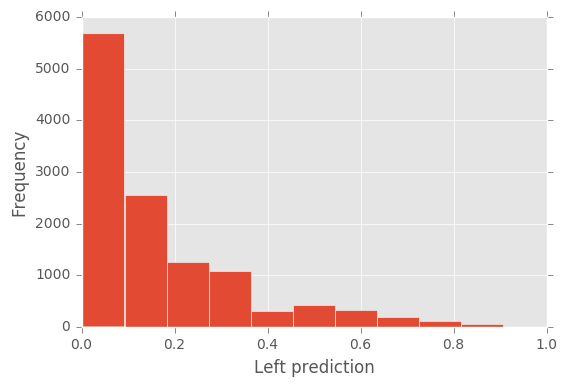

In [14]:
# See the proportion of employee attrition according to the model
predicted_left_continuous = pd.Series(logreg.predict())
plt.hist(predicted_left_continuous)
plt.xlabel("Left prediction")
plt.ylabel("Frequency")

In [15]:
# Assess the correlation between estimated attrition and actual
predicted_left_continuous.corr(data["left"])

0.40520165758187826

In [16]:
# Cutoff to determine when P[leaving] should be considered as a leaver or not.
# Note you can play with this parameter.
cutoff=0.5
predicted_left = (predicted_left_continuous > cutoff)
predicted_left

0        False
1        False
2        False
3        False
4        False
5        False
6         True
7        False
8        False
9        False
10       False
11        True
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20        True
21       False
22        True
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
11970    False
11971    False
11972    False
11973    False
11974    False
11975    False
11976    False
11977    False
11978    False
11979    False
11980    False
11981    False
11982    False
11983    False
11984    False
11985    False
11986    False
11987     True
11988    False
11989    False
11990    False
11991    False
11992    False
11993    False
11994     True
11995    False
11996    False
11997    False
11998     True
11999    False
dtype: bool

In [19]:
count=0
for i in predicted_left:
    if i==False:
        count+=1
print(count/len(predicted_left))


0.9235833333333333


In [13]:
# Compute the accuracy of our prediction.
did_leave = (data["left"] == 1)
predicted_correct = (predicted_left == did_leave)
print("Overall accuracy:")
print("%d / %d =" % (predicted_correct.sum(), predicted_correct.count()))
print(predicted_correct.sum() / predicted_correct.count())

Overall accuracy:
9834 / 12000 =
0.8195


In [14]:
# Compute how well we did on the people who stayed.
did_stay = (data["left"] == 0)
print((predicted_correct & did_stay).sum() / did_stay.sum())

0.8888


In [15]:
# Compute how well we did on the people who left.
print((predicted_correct & did_leave).sum() / did_leave.sum())

0.473


# Looking at Time in Company

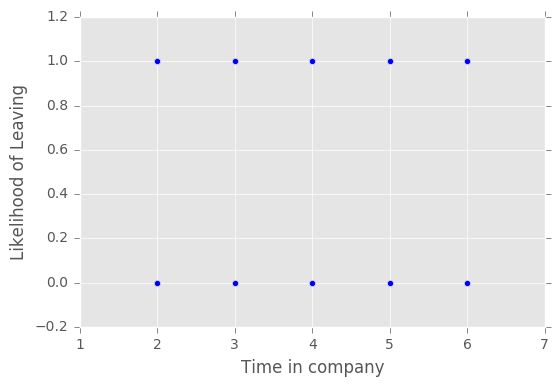

In [16]:
# Let's use a more visual way to see the effect of one of the most important driver: TIC
plt.scatter(data["TIC"], data["left"])
plt.xlabel("Time in company")
plt.ylabel("Likelihood of Leaving")
plt.show()

In [ ]:
# That was useless. Let's try plotting the average rate of attrition
# for each of the TIC values.

In [17]:
# This returns a GroupBy object.
# http://pandas.pydata.org/pandas-docs/stable/api.html#id35
data_grouped_by_tic = data["left"].groupby(data["TIC"])
data_grouped_by_tic

In [18]:
# Let's compute the mean within each group.
data_grouped_by_tic_mean = data_grouped_by_tic.mean()
data_grouped_by_tic_mean

TIC
2    0.010262
3    0.165727
4    0.240777
5    0.444240
6    0.212891
Name: left, dtype: float64

In [19]:
# Note that we can get at the TIC value by using the index property.
data_grouped_by_tic_mean.index

Int64Index([2, 3, 4, 5, 6], dtype='int64', name=u'TIC')

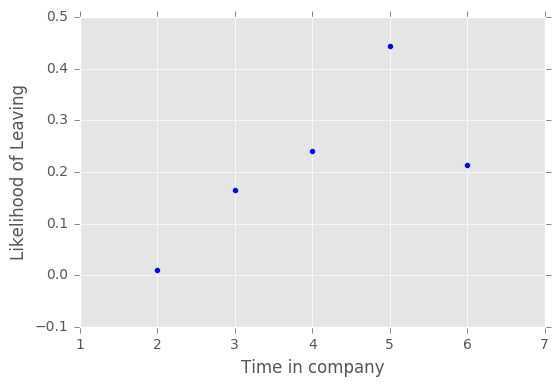

In [20]:
# Now let's try a scatter plot of the means.
plt.scatter(data_grouped_by_tic_mean.index,
            data_grouped_by_tic_mean)
plt.xlabel("Time in company")
plt.ylabel("Likelihood of Leaving")
plt.show()

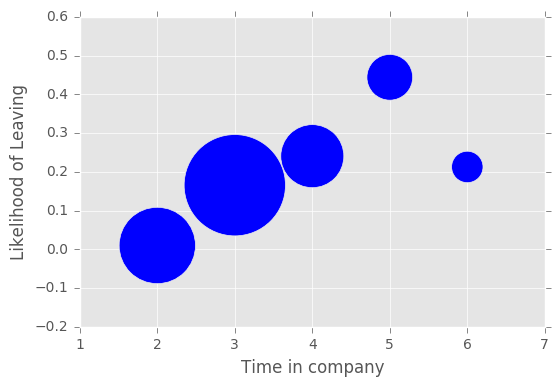

In [21]:
# We could further improve this by using the count within each group
# for the size of the button.
plt.scatter(data_grouped_by_tic_mean.index,
            data_grouped_by_tic_mean,
            s=data_grouped_by_tic.count())
plt.xlabel("Time in company")
plt.ylabel("Likelihood of Leaving")
plt.show()

# Looking at Employee Satisfaction

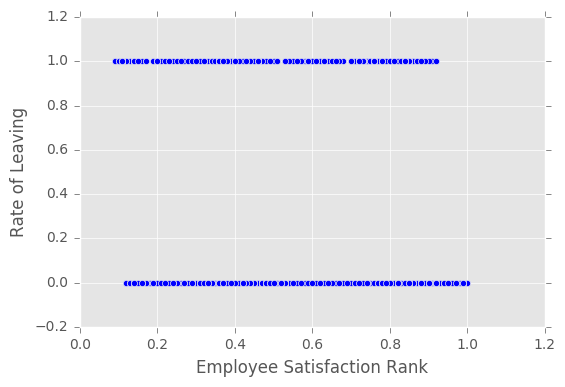

In [22]:
# Let's try to visualize this, and go make the same mistake that
# we made last time.
plt.scatter(data["S"], data["left"])
plt.xlabel("Employee Satisfaction Rank")
plt.ylabel("Rate of Leaving")
plt.show()

In [ ]:
# Last time, there were just 5 "x" values, so we could group the
# attrition by those values. This time it's harder. Our strategy
# will be to create 20 satisfaction bins, and examine the attrition
# within each of these bins.

In [23]:
# Use the cut function to cut into 20 bins.
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
satisfaction_bins = pd.cut(data["S"], 20)
satisfaction_bins.cat.categories

Index([u'(0.0891, 0.136]', u'(0.136, 0.181]', u'(0.181, 0.227]',
       u'(0.227, 0.272]', u'(0.272, 0.318]', u'(0.318, 0.363]',
       u'(0.363, 0.408]', u'(0.408, 0.454]', u'(0.454, 0.499]',
       u'(0.499, 0.545]', u'(0.545, 0.59]', u'(0.59, 0.636]',
       u'(0.636, 0.681]', u'(0.681, 0.727]', u'(0.727, 0.772]',
       u'(0.772, 0.818]', u'(0.818, 0.863]', u'(0.863, 0.909]',
       u'(0.909, 0.954]', u'(0.954, 1]'],
      dtype='object')

In [25]:
# Now group the data by "satisfaction bin". This time we're grouping
# the full DataFrame, because we'll want to deal with "S" and "left".
data_grouped_by_sbin = data.groupby(satisfaction_bins)

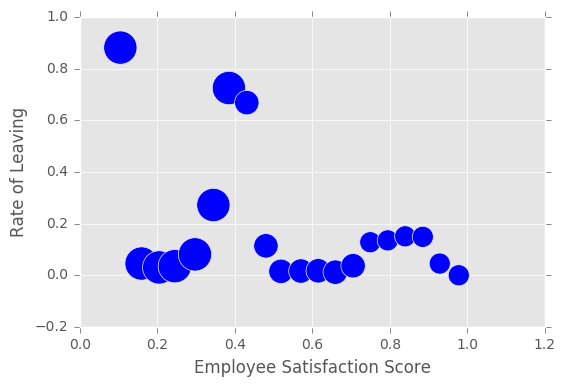

In [26]:
# Now let's take a look at rate of leaving as a function of employee
# satisfaction.
plt.scatter(data_grouped_by_sbin["S"].mean(),
            data_grouped_by_sbin["left"].mean(),
            s=data_grouped_by_sbin.count())
plt.xlabel("Employee Satisfaction Score")
plt.ylabel("Rate of Leaving")
plt.show()

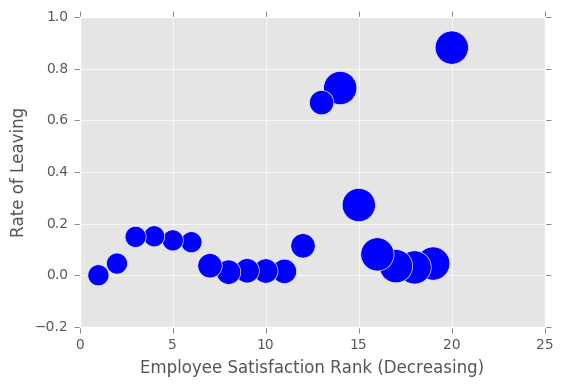

In [27]:
# Or we can plot by dissatisfaction bin.
plt.scatter(range(20,0,-1),
            data_grouped_by_sbin["left"].mean(),
            s=data_grouped_by_sbin.count())
plt.xlabel("Employee Satisfaction Rank (Decreasing)")
plt.ylabel("Rate of Leaving")
plt.show()